In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pip install xgboost

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
#headings
df.head

<bound method NDFrame.head of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  con

In [ ]:
#shape
df.shape

(4600, 18)

In [ ]:
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


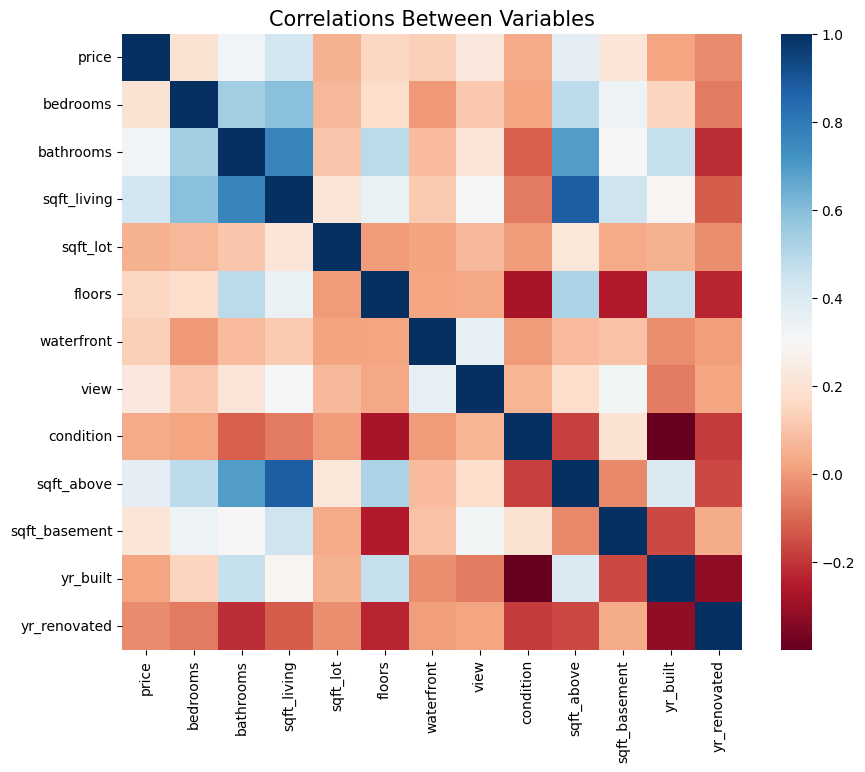

In [ ]:
#Visualizing the correlations between numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [ ]:
df.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


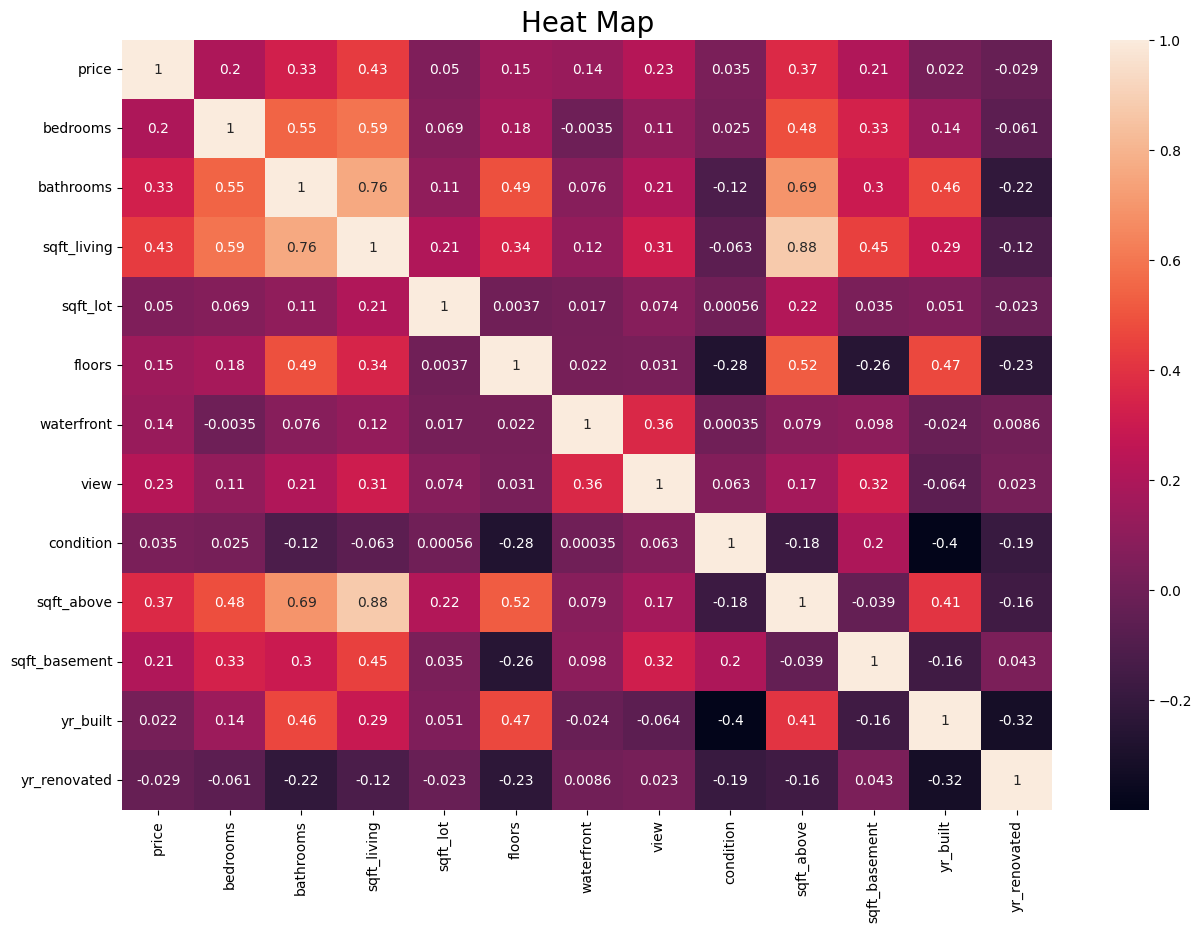

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

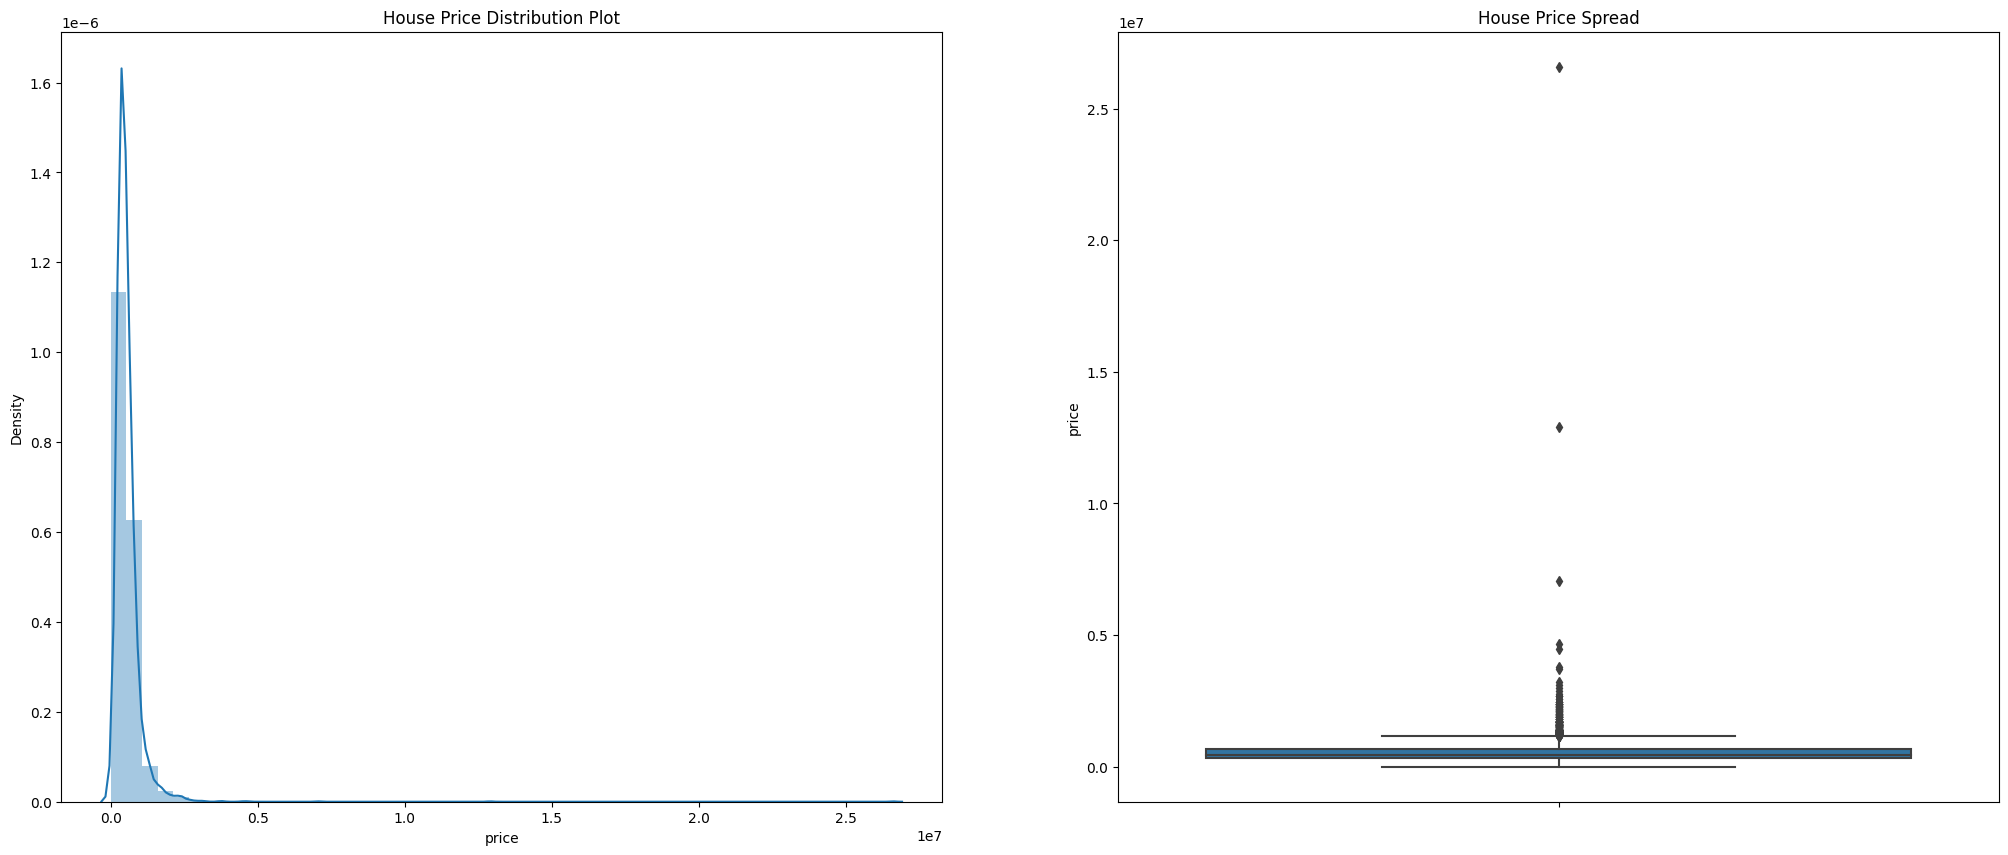

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df["price"])

plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y=df["price"])

plt.show()

In [ ]:
def Categorical_Plot(column,rotation=0):

        plt.figure(figsize=(30, 10))
        plt.subplot(1, 2, 1)
        pd.value_counts(df[column]).plot(kind='bar')
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.ylabel("Count\n", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Count\n", fontsize = 15)

        plt.subplot(1, 2, 2)
        sns.barplot(x = df[column], y = df.price)
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()

In [ ]:
#function for box plots and scatter plots for Numerical features

def Numerical_Plot(column):

        plt.figure(figsize=(20, 5))
        plt.subplot(1,2,1)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.boxplot(df[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"\n{str(column)} Box Plot\n", fontsize = 15)

        plt.subplot(1, 2,2)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.scatterplot(x=df[column],y=df["price"],hue=df[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()


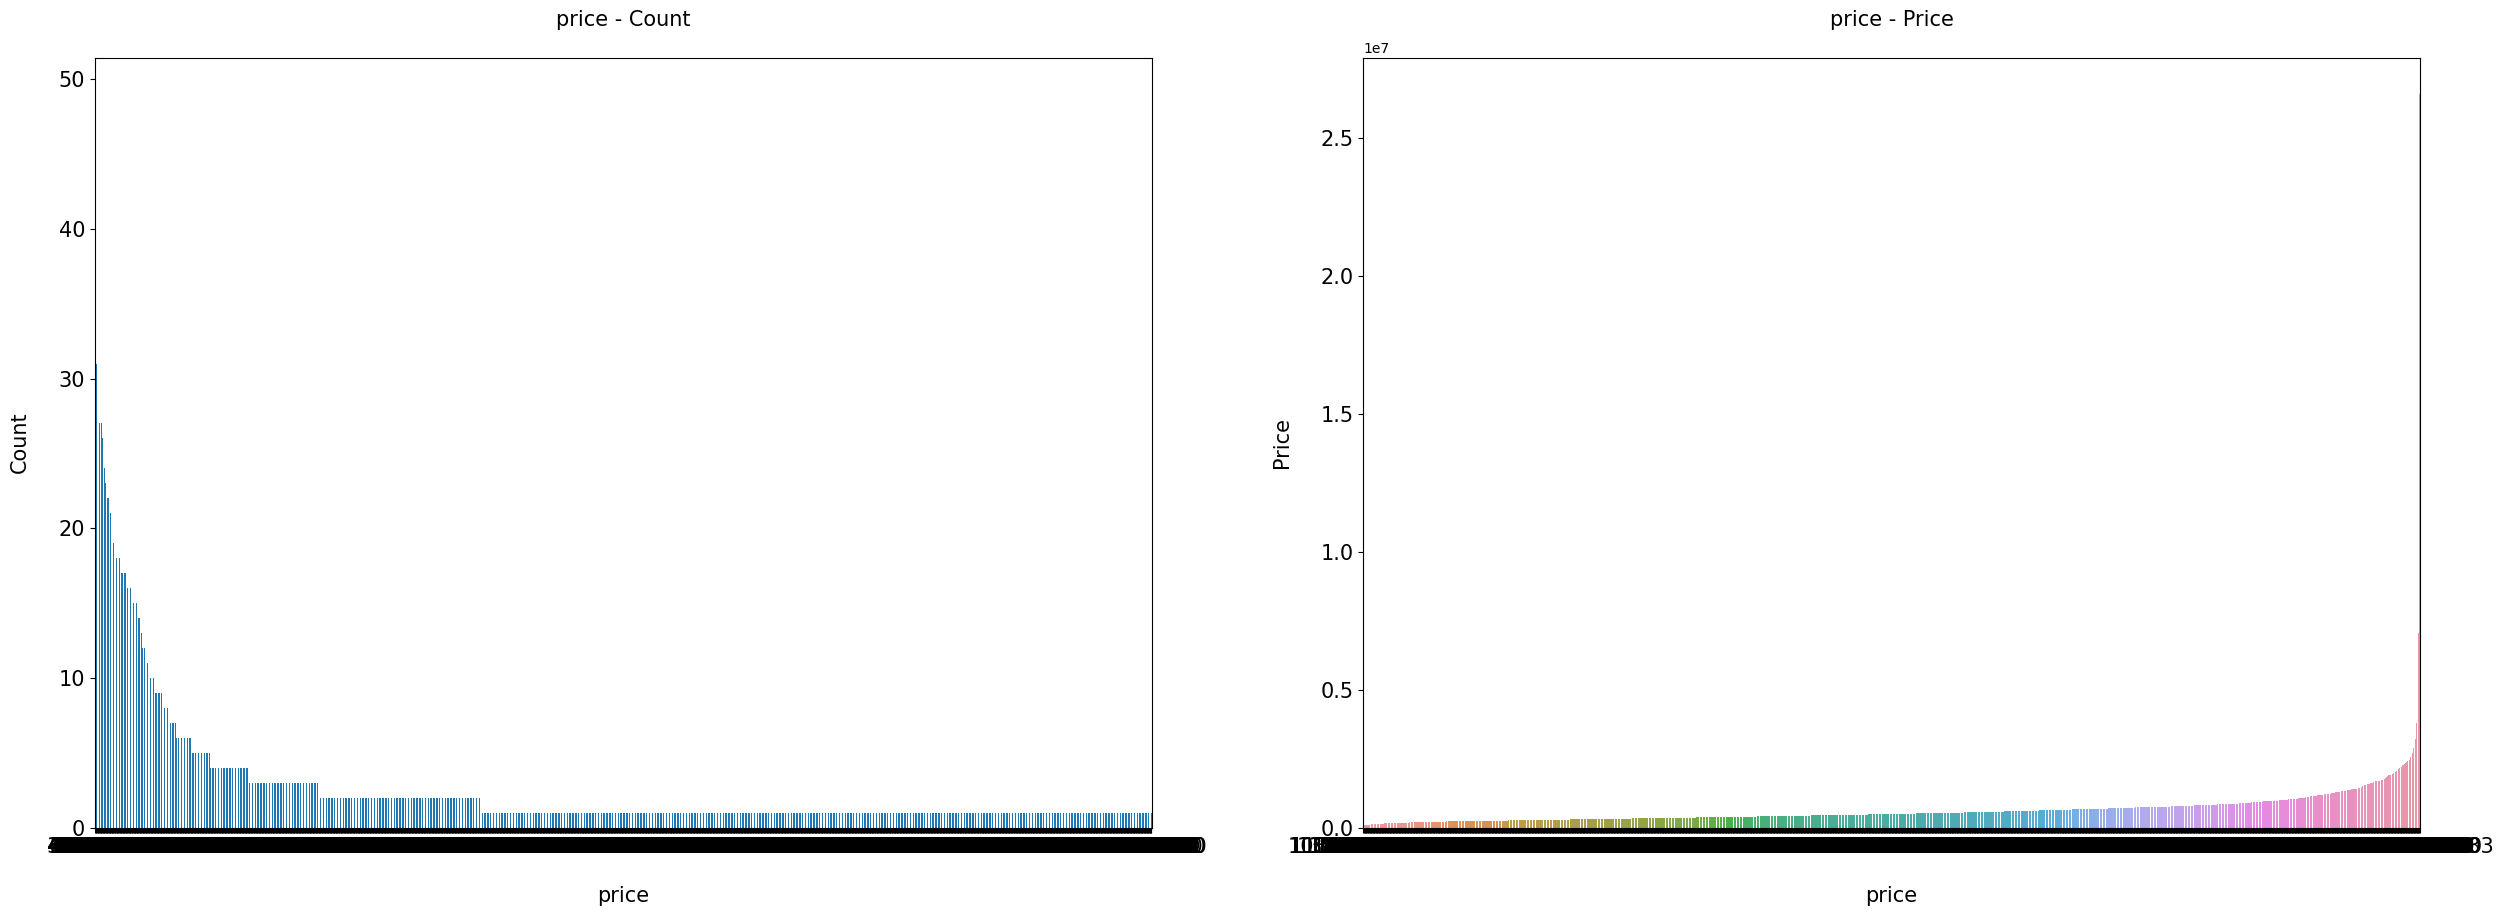

In [ ]:
Categorical_Plot("price")

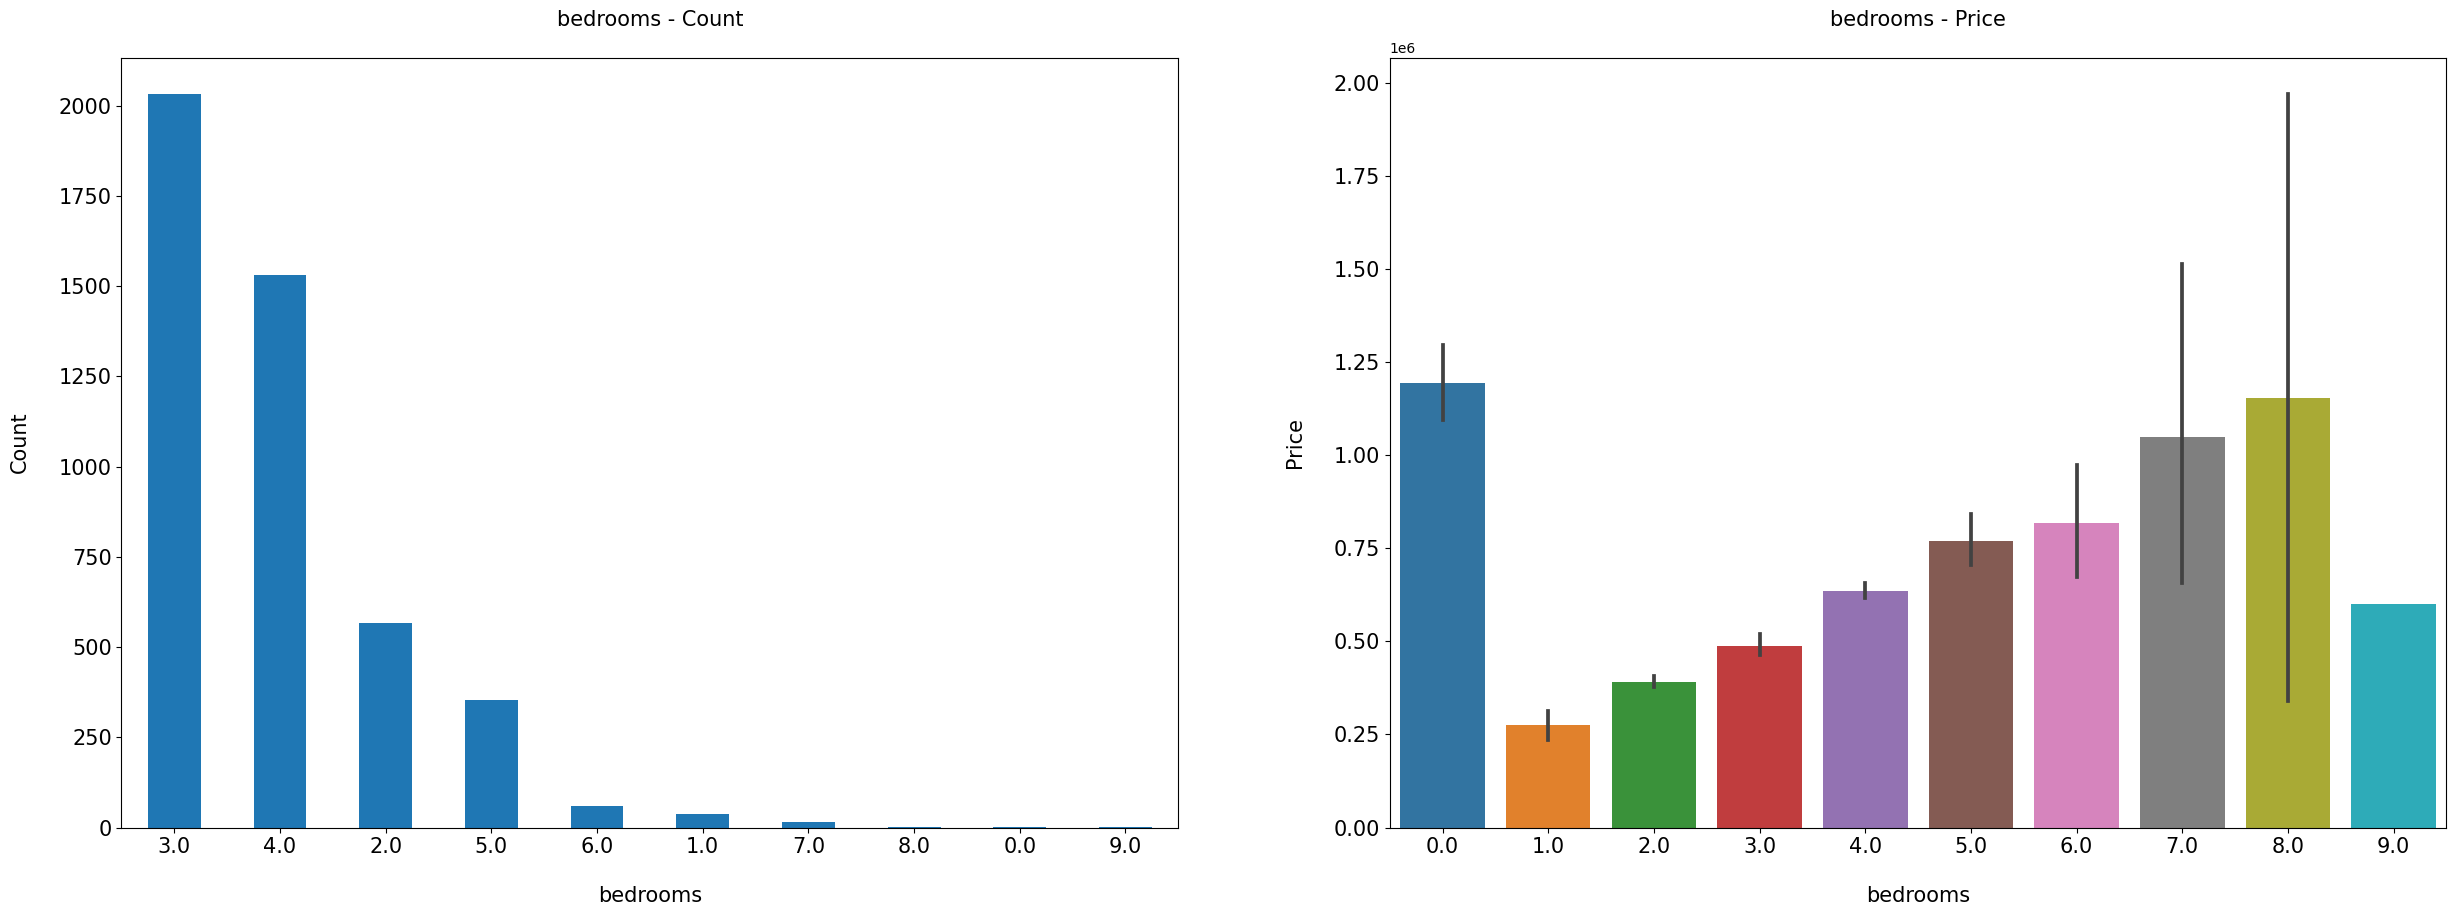

In [ ]:
Categorical_Plot("bedrooms")

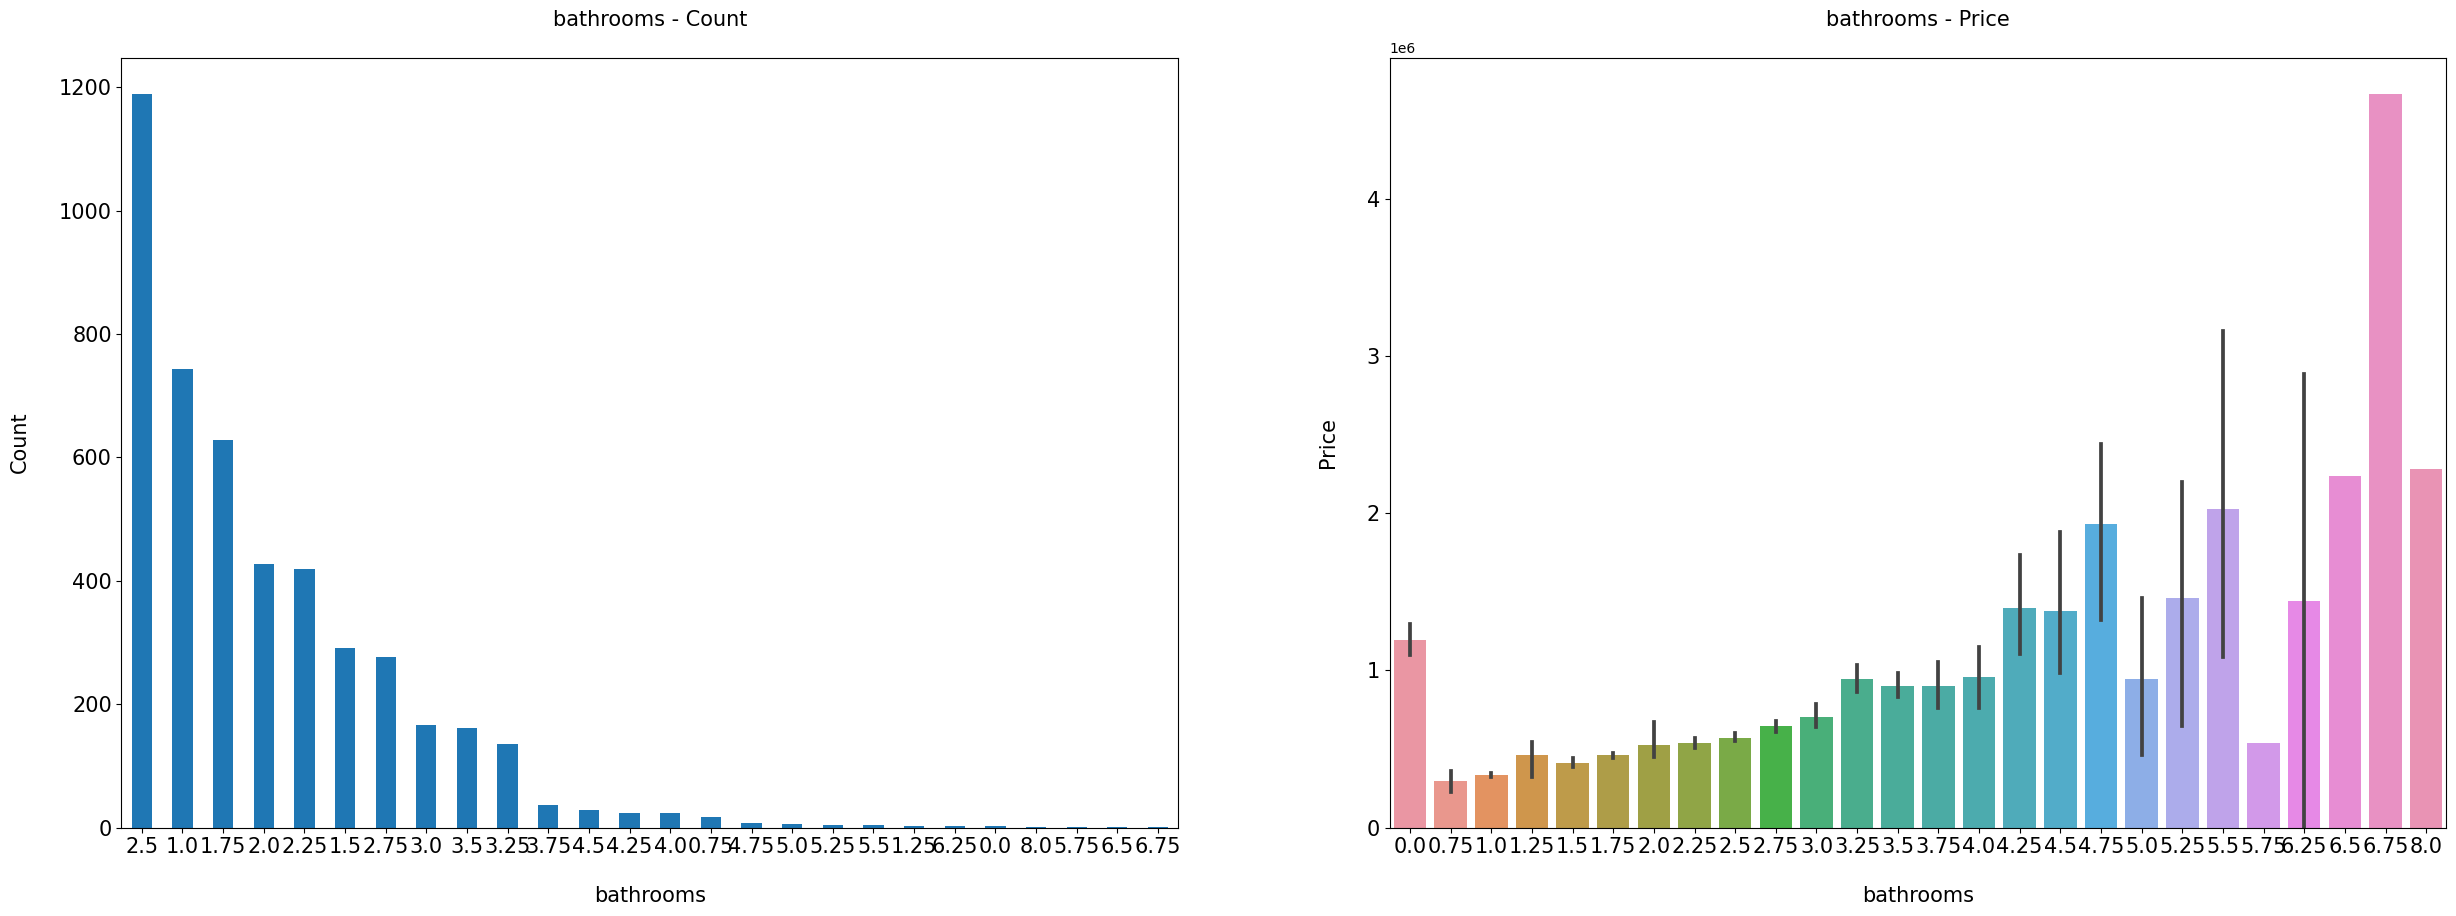

In [ ]:
Categorical_Plot("bathrooms")

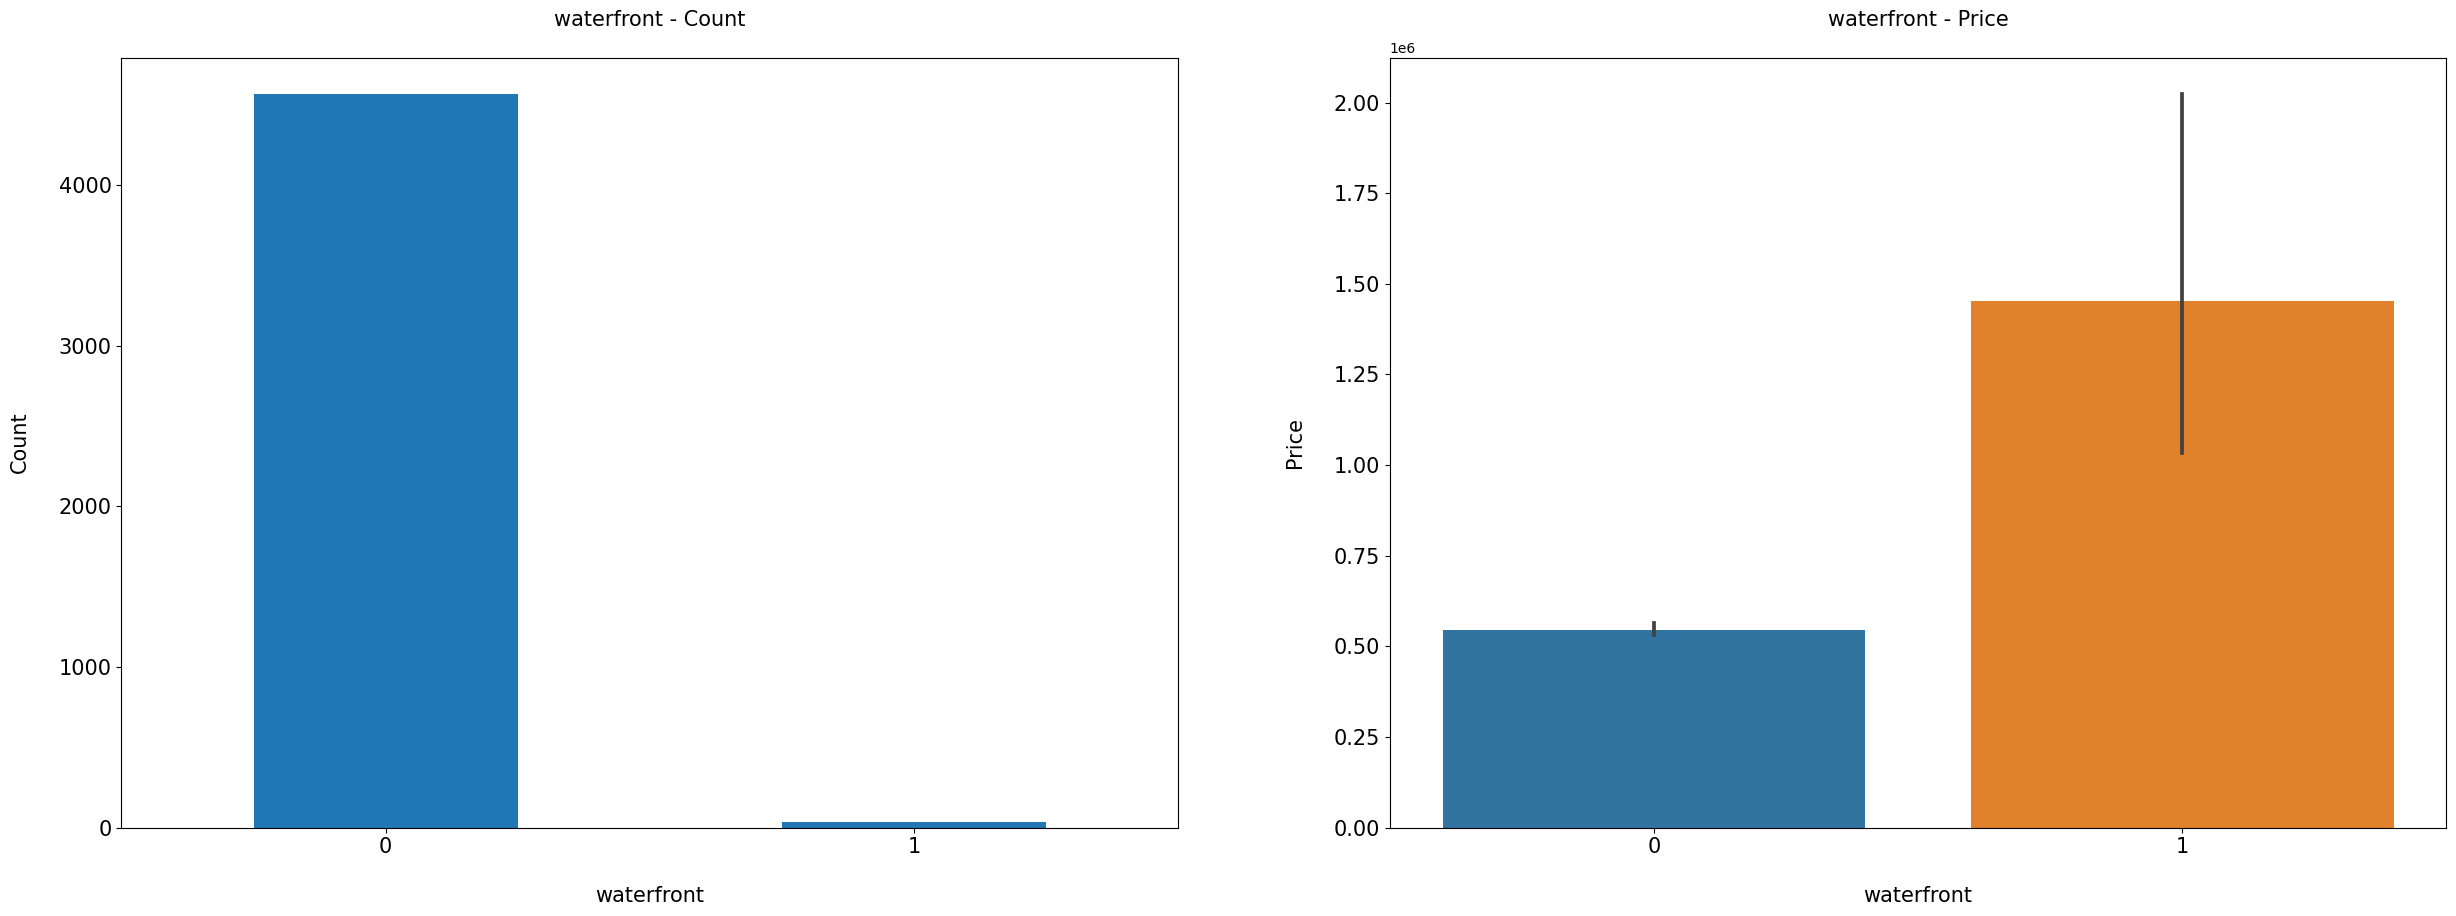

In [ ]:
Categorical_Plot("waterfront")

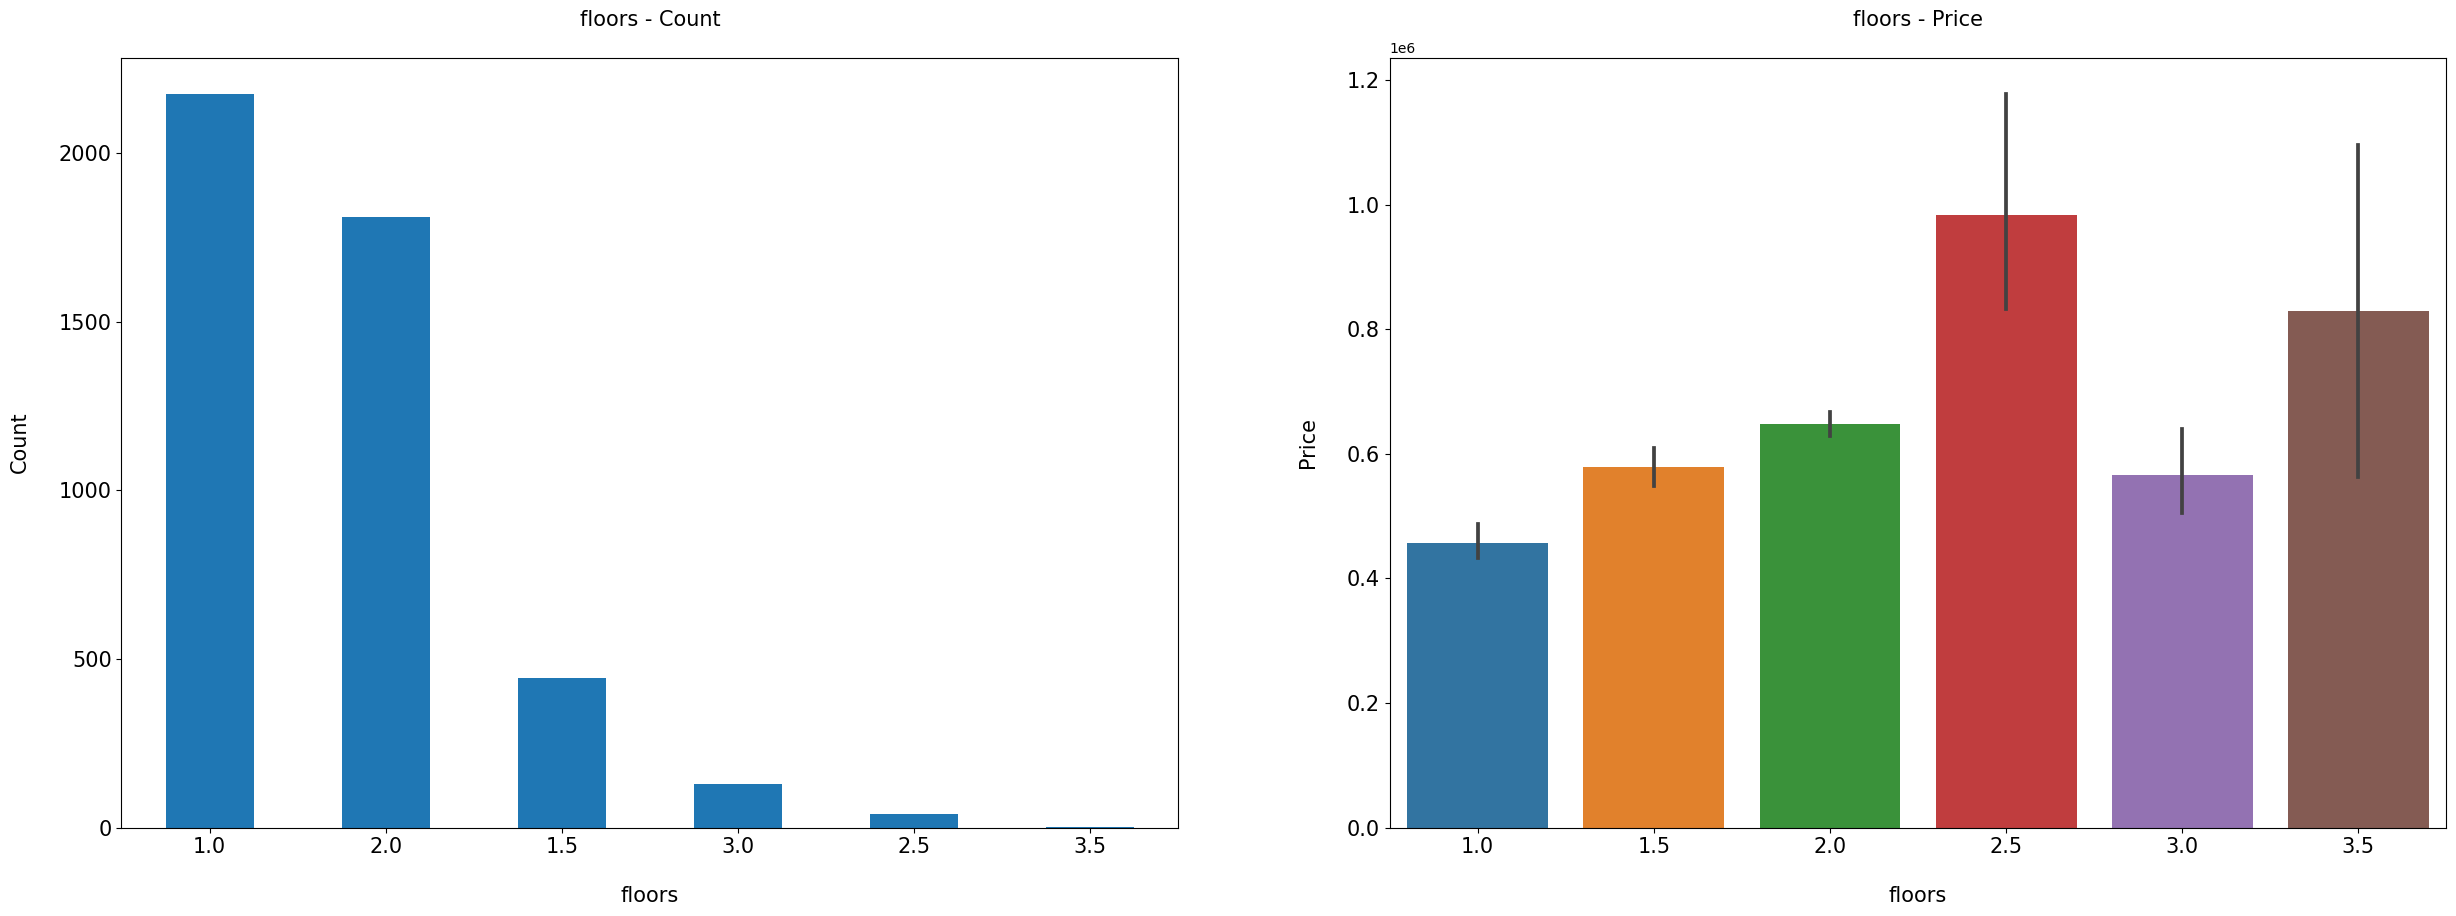

In [ ]:
Categorical_Plot("floors")

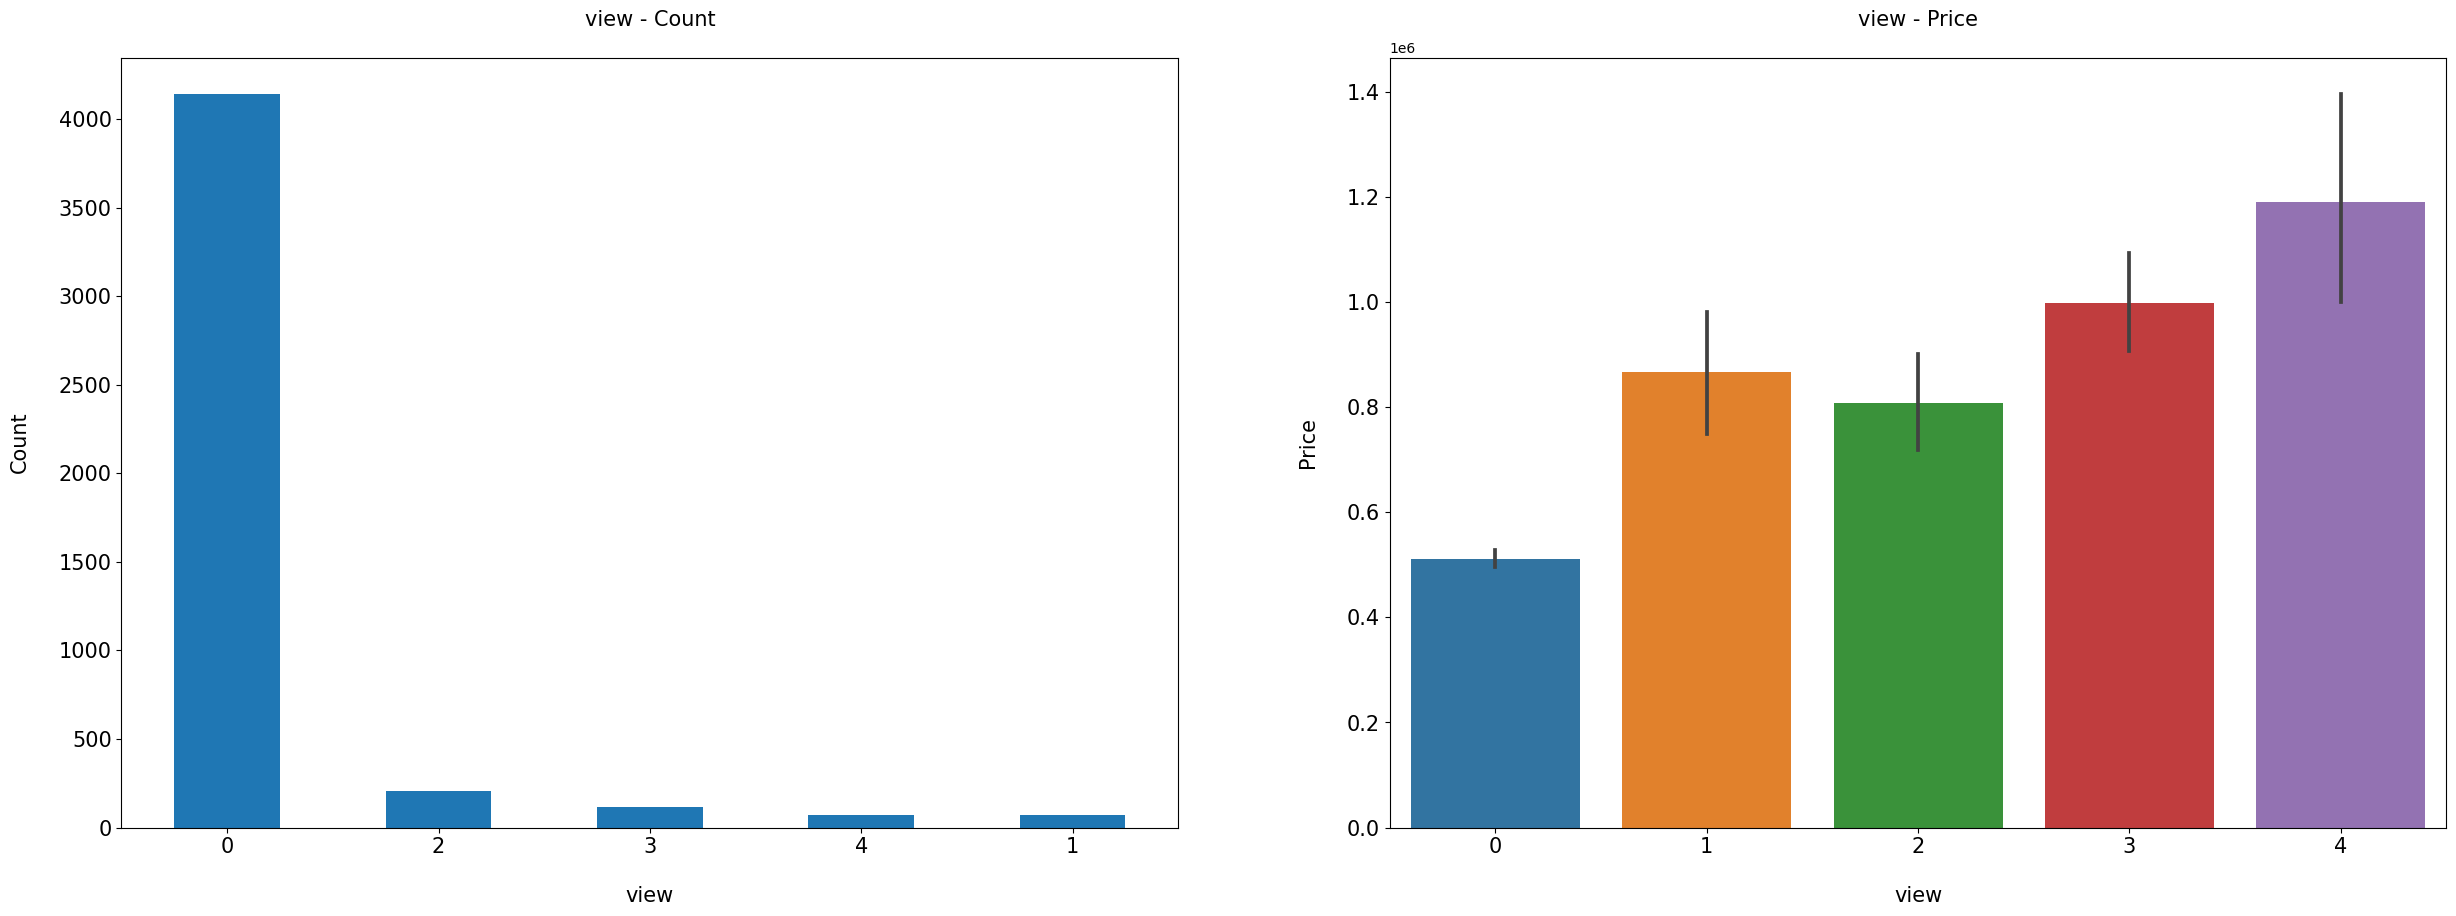

In [ ]:
Categorical_Plot("view")

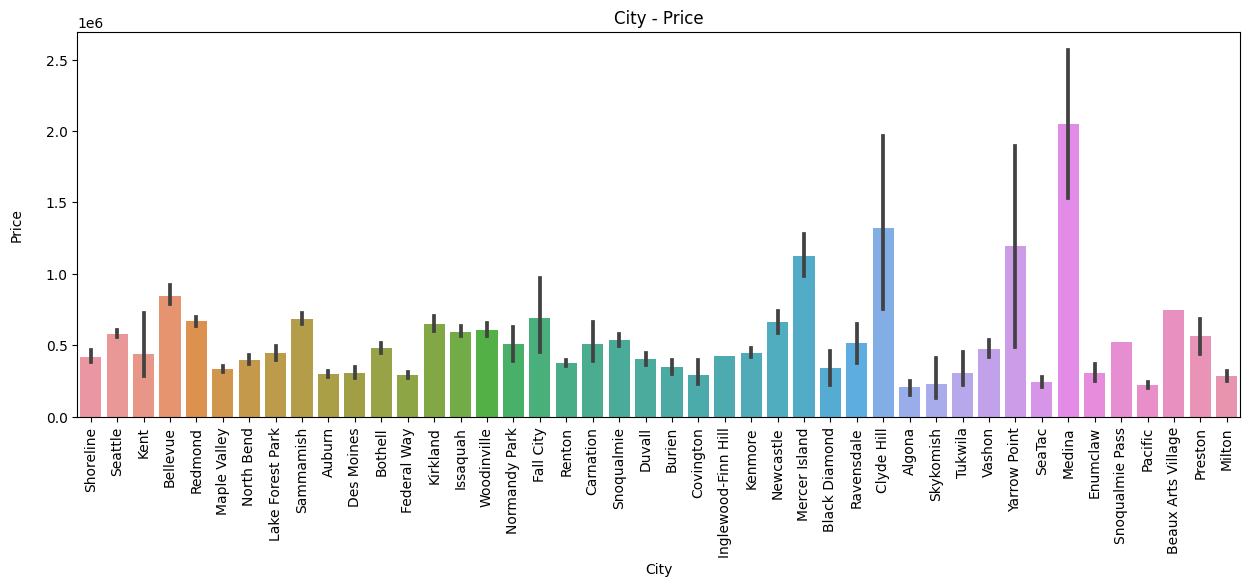

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x = df['city'], y = df.price)
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.xlabel("City")
plt.title("City - Price")
plt.ylabel("Price\n")

plt.show()

<Figure size 3500x500 with 0 Axes>

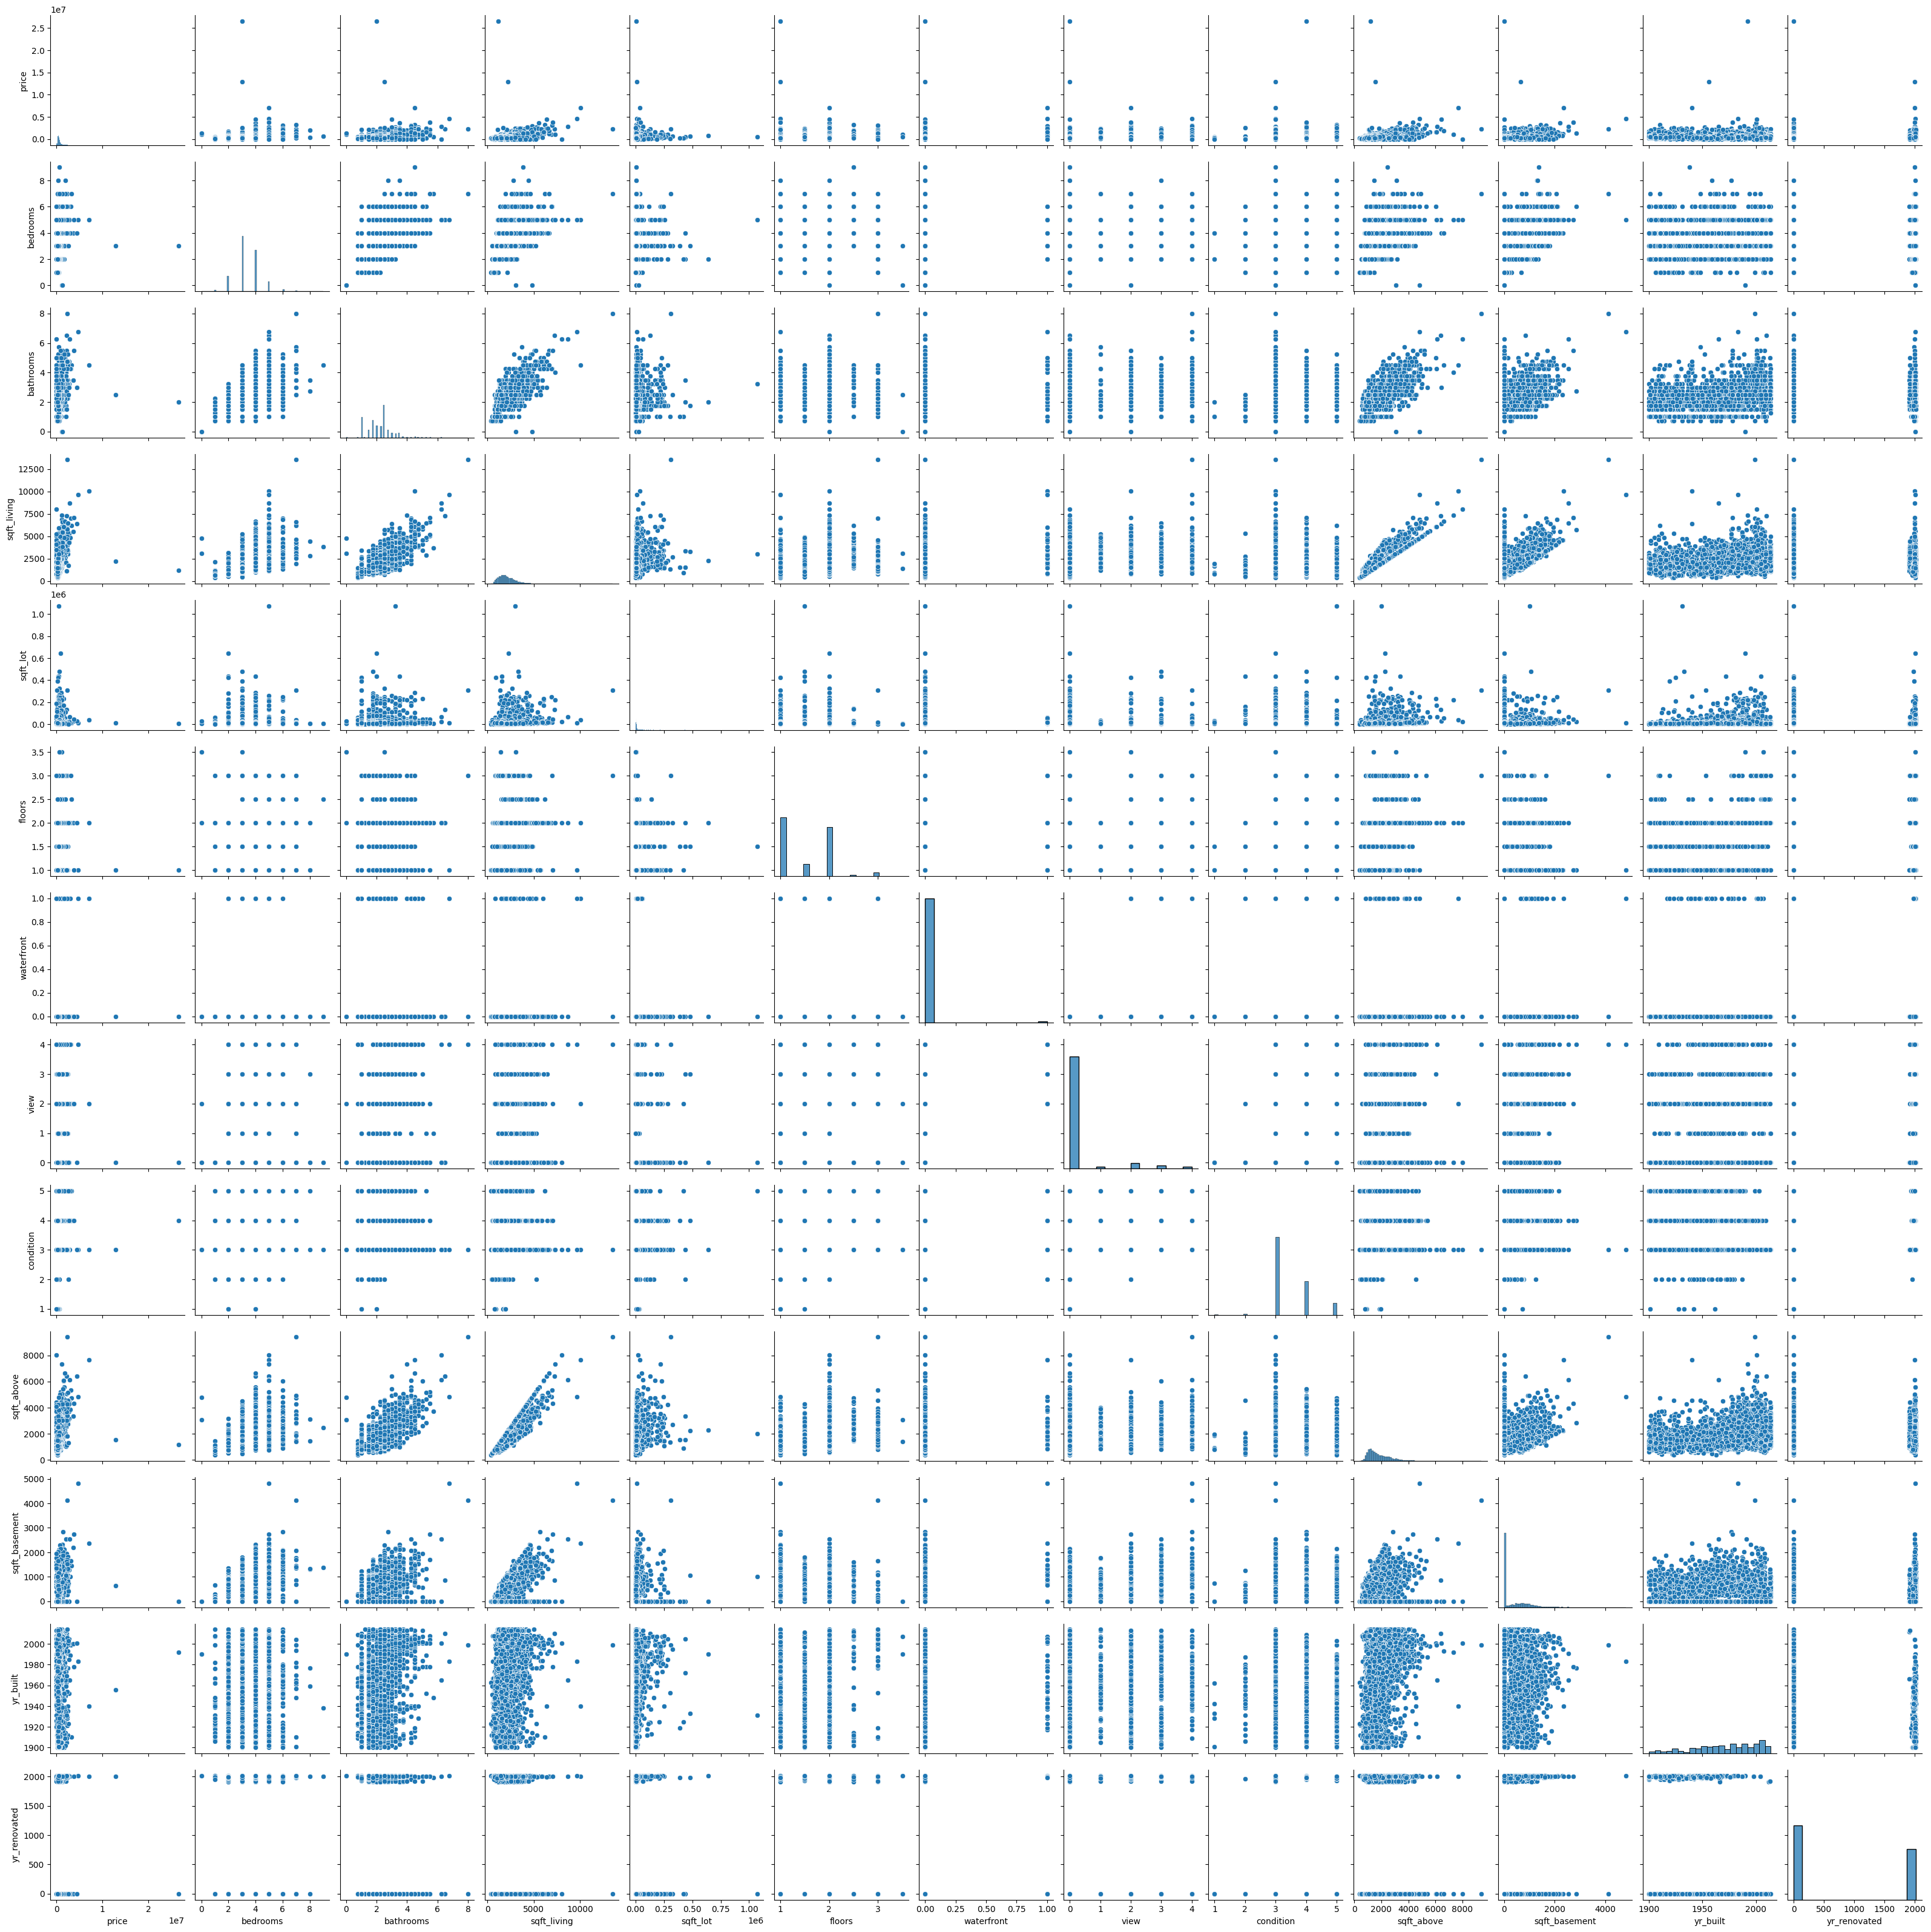

In [ ]:
plt.figure(figsize=(35, 5))
sns.pairplot(df)
plt.show()

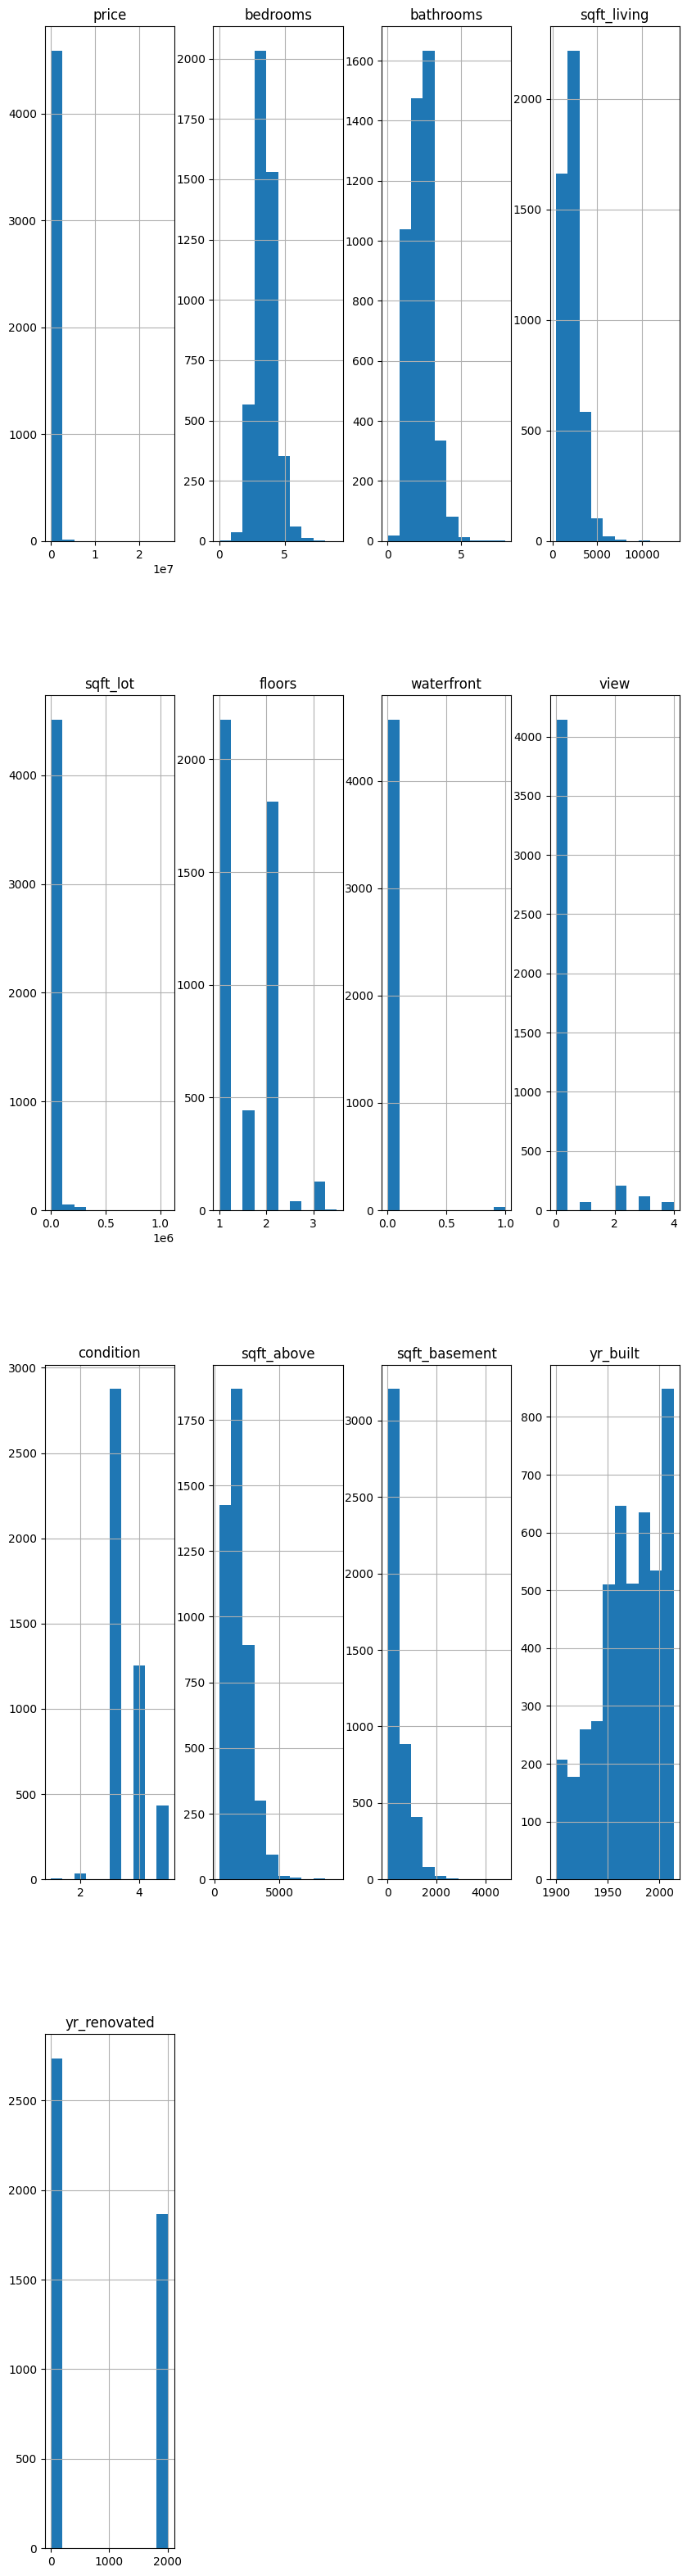

In [ ]:
df.hist(figsize=(10,40));

In [ ]:
# Checking Outliers
q3, q1 = df.quantile(0.75), df.quantile(0.25),
iqr = q3-q1
maxm, minm = q3 + 1.5*iqr, q1 - 1.5*iqr

print(((df < minm) | (df > (maxm))).sum())

bathrooms        141
bedrooms         118
city               0
condition          6
country            0
date               0
floors             0
price            240
sqft_above       116
sqft_basement     82
sqft_living      129
sqft_lot         541
statezip           0
street             0
view             460
waterfront        33
yr_built           0
yr_renovated       0
dtype: int64


In [ ]:
# Removing outliers
df = df[~((df < minm) | (df > maxm)).any(axis=1)]
print(((df < minm) | (df > (maxm))).sum())
print("DataFrame shape after removing outliers:", df.shape)

bathrooms        0
bedrooms         0
city             0
condition        0
country          0
date             0
floors           0
price            0
sqft_above       0
sqft_basement    0
sqft_living      0
sqft_lot         0
statezip         0
street           0
view             0
waterfront       0
yr_built         0
yr_renovated     0
dtype: int64
DataFrame shape after removing outliers: (3448, 18)


In [ ]:
house = pd.get_dummies(df, columns=['city'], prefix = ['city'])

In [ ]:
house = house.drop(['date', 'street', 'statezip', 'country','sqft_above'], axis = 1)
house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,0,...,0,0,1,0,0,0,0,0,0,0
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,800,...,0,0,0,0,0,0,0,0,0,0
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,0,...,0,1,0,0,0,0,0,0,0,0
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1020,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
columns = house.columns
house.shape

(3448, 56)

In [ ]:
from sklearn import preprocessing

In [ ]:
#MinMax Scaling
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
house = pd.DataFrame(scaler.fit_transform(house), columns = columns)
house.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0.272174,0.333333,0.272727,0.213483,0.374295,0.2,0.0,0.0,0.333333,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.297391,0.333333,0.454545,0.379213,0.583156,0.0,0.0,0.0,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.365217,0.333333,0.545455,0.398876,0.380403,0.0,0.0,0.0,0.666667,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.478261,0.666667,0.636364,0.382022,0.508256,0.0,0.0,0.0,0.666667,0.533333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.426087,0.000000,0.090909,0.084270,0.294995,0.0,0.0,0.0,0.333333,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.291304,0.000000,0.454545,0.216292,0.097262,0.0,0.0,0.0,0.333333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.556522,0.666667,0.454545,0.264045,0.285677,0.2,0.0,0.0,0.333333,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.402609,0.333333,0.363636,0.317416,0.343651,0.0,0.0,0.0,0.333333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.511739,0.333333,0.363636,0.491573,0.735597,0.0,0.0,0.0,0.333333,0.240000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.317391,0.333333,0.090909,0.143258,0.297842,0.0,0.0,0.0,0.666667,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
X = house.drop('price', axis=1)
y = house['price']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create Linear Regression model
Reg = LinearRegression()

# Train the model
Reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
Reg.intercept_, Reg.coef_

(34658816410.722,
 array([-5.42123851e-02,  7.06719506e-02,  5.52117287e-01, -4.67718275e-02,
         3.78919619e-02,  8.38593411e+11, -6.12568315e+11,  5.16133926e-02,
        -7.67893954e-02, -1.03283551e-01, -1.51911949e-03, -3.46588164e+10,
        -3.46588164e+10, -3.46588164e+10, -3.46588164e+10, -3.46588164e+10,
        -3.46588164e+10, -3.46588164e+10, -3.46588164e+10, -3.46588164e+10,
        -3.46588164e+10, -3.46588164e+10, -3.46588164e+10, -3.46588164e+10,
        -3.46588164e+10, -3.46588164e+10, -3.46588164e+10, -3.46588164e+10,
        -3.46588164e+10, -3.46588164e+10, -3.46588164e+10, -3.46588164e+10,
        -3.46588164e+10, -3.46588164e+10, -3.46588164e+10, -3.46588164e+10,
        -3.46588164e+10, -3.46588164e+10, -3.46588164e+10, -3.46588164e+10,
        -3.46588164e+10, -3.46588164e+10, -3.46588164e+10, -3.46588164e+10,
        -3.46588164e+10, -3.46588164e+10, -3.46588164e+10, -3.46588164e+10,
        -3.46588164e+10, -3.46588164e+10, -3.46588164e+10, -3.46588164

In [ ]:
# Make predictions on the  test set
y_pred = Reg.predict(X_test)

In [ ]:
# Calculation of Evaluation Metrics

print ("mse:", mean_squared_error(y_test, y_pred))
print ("mae: ", mean_absolute_error(y_test, y_pred))
print ("r2: ", r2_score(y_test, y_pred))

mse: 0.009955917891459743
mae:  0.06869784851106131
r2:  0.6637868718517486


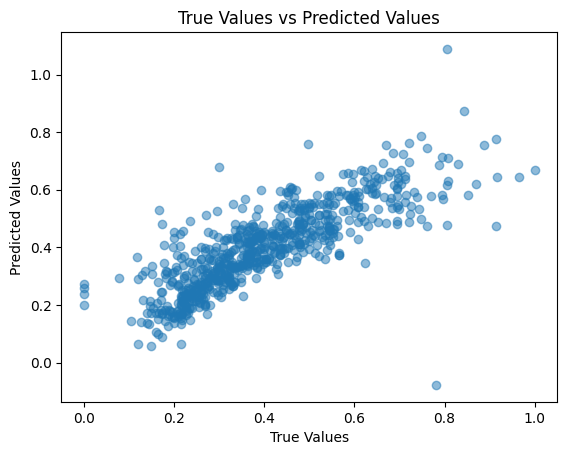

In [ ]:
# Scatter plot of true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

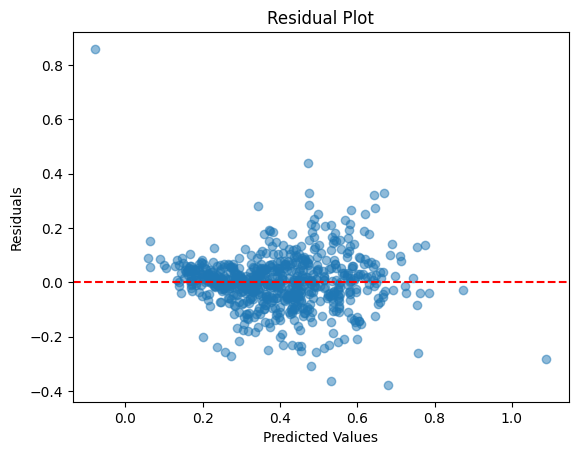

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

In [ ]:
# Specify hyperparameters for tuning
# Define the parameter grid with regularization strength (alpha)
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'alpha': [0.1, 1.0, 10.,100.0]  # Regularization strength
}

In [ ]:
# Create Linear Regression model with Ridge regularization
regd = Ridge()

In [ ]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(regd, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True}


In [ ]:
# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred_tun = best_model.predict(X_test)

In [ ]:
# Calculation of Evaluation Metrics after tuning

print ("mse_tun:", mean_squared_error(y_test, y_pred_tun))
print ("mae_tun: ", mean_absolute_error(y_test, y_pred_tun))
print ("r2_tun: ", r2_score(y_test, y_pred_tun))

mse_tun: 0.009870210872316433
mae_tun:  0.06859207923637227
r2_tun:  0.6666812132198259


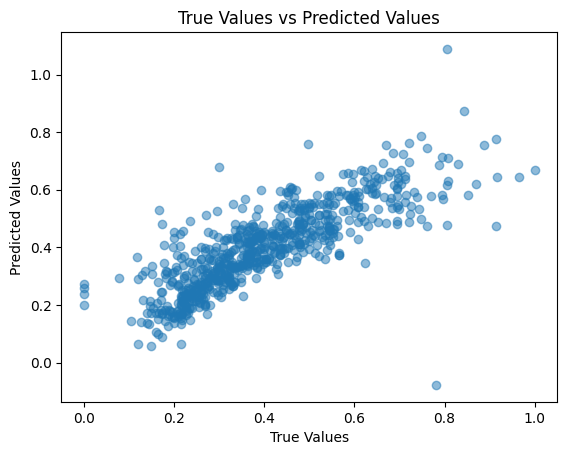

In [ ]:
# Scatter plot of true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

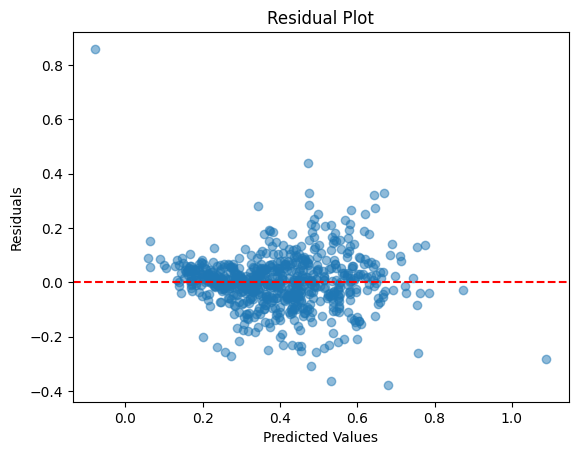

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


# Create Random Forest model
random_forest = RandomForestRegressor(random_state=42)

In [ ]:
# Define the parameter grid for random search
param_dist = {
    'n_estimators': [300, 500, 700],
    'max_depth': [None, 10, 20, 30],  # Extend max_depth range
    'min_samples_split': [2, 5, 10, 15],  # Extend min_samples_split range
    'min_samples_leaf': [1, 2, 4, 8],  # Extend min_samples_leaf range
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],  # Allow bootstrap sampling or not
    'criterion': ['mse', 'mae','poisson', 'friedman_mse']  # Use either Mean Squared Error or Mean Absolute Error
}

In [ ]:
# Create RandomizedSearchCV
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

In [ ]:
# Fit the model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae', 'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [300, 500, 700]},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Get the best hyperparameters
best_params_rf = random_search.best_params_
print("Best Hyperparameters:", best_params_rf)

Best Hyperparameters: {'n_estimators': 700, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'poisson', 'bootstrap': False}


In [ ]:
# Make predictions on the test set using the best model
best_model_rf = random_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

In [ ]:
# Calculation of Evaluation Metrics

print ("mse_rf:", mean_squared_error(y_test, y_pred_rf))
print ("mae_rf: ", mean_absolute_error(y_test, y_pred_rf))
print ("r2_rf: ", r2_score(y_test, y_pred_rf))

mse_rf: 0.009383798099818345
mae_rf:  0.06945432026774007
r2_rf:  0.6831074595585116


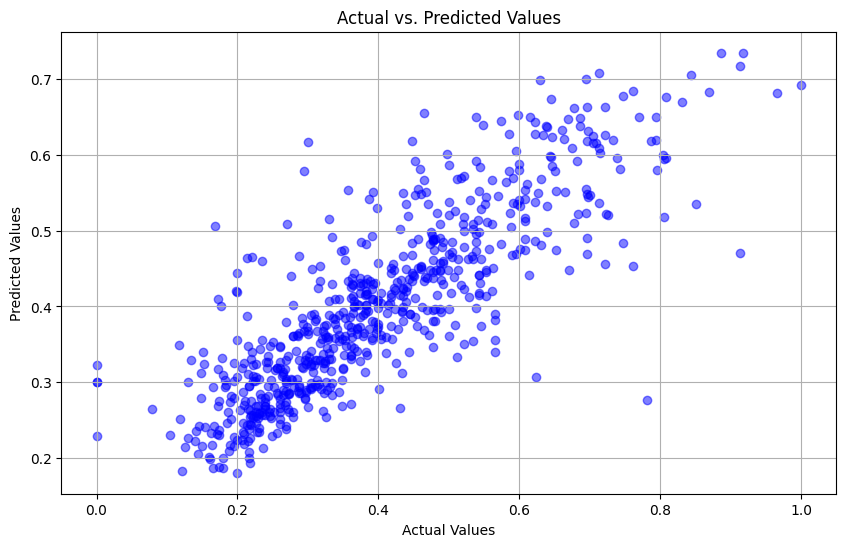

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.layers import Dropout


In [ ]:
## Build the updated ANN model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               28672     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 203265 (794.00 KB)
Trainable params: 20326

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
69/69 [==============================] - 3s 12ms/step - loss: 0.0208 - val_loss: 0.0100
Epoch 2/50
69/69 [==============================] - 0s 6ms/step - loss: 0.0108 - val_loss: 0.0118
Epoch 3/50
69/69 [==============================] - 0s 6ms/step - loss: 0.0104 - val_loss: 0.0129
Epoch 4/50
69/69 [==============================] - 0s 6ms/step - loss: 0.0095 - val_loss: 0.0110
Epoch 5/50
69/69 [==============================] - 0s 5ms/step - loss: 0.0098 - val_loss: 0.0100
Epoch 6/50
69/69 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.0102
Epoch 7/50
69/69 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.0099
Epoch 8/50
69/69 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.0106
Epoch 9/50
69/69 [==============================] - 0s 6ms/step - loss: 0.0086 - val_loss: 0.0093
Epoch 10/50
69/69 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.0117
Epoch 11/50
69/69 

In [ ]:
# Predictions on the test set
y_pred_ann = model.predict(X_test).flatten()

22/22 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate the model's performance using regression metrics

print ("mse_ann:", mean_squared_error(y_test, y_pred_ann))
print ("mae_ann: ", mean_absolute_error(y_test, y_pred_ann))
print ("r2_ann: ", r2_score(y_test, y_pred_ann))

mse_ann: 0.011627611356787025
mae_ann:  0.07412639312593321
r2_ann:  0.6073334844885601


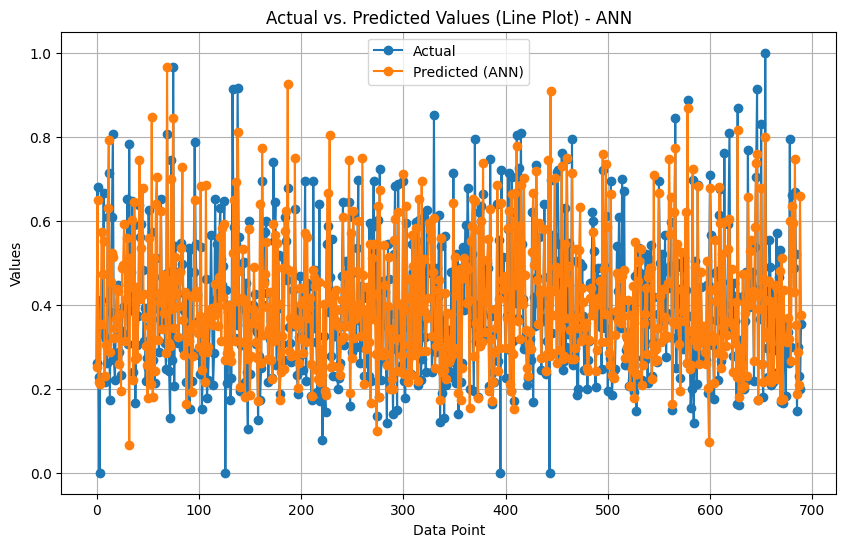

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', marker='o')
plt.plot(np.arange(len(y_test)), y_pred_ann, label='Predicted (ANN)', marker='o')
plt.title('Actual vs. Predicted Values (Line Plot) - ANN')
plt.xlabel('Data Point')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

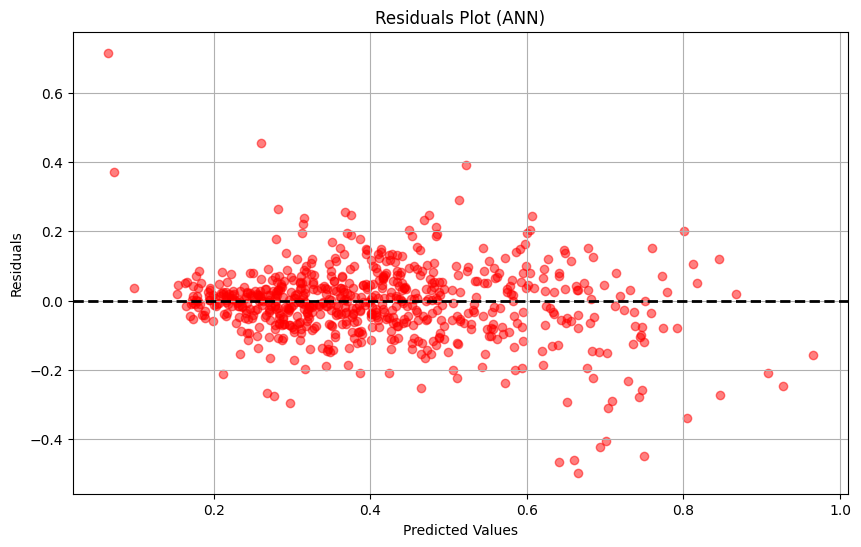

In [131]:
# Residuals plot
residuals_ann = y_test - y_pred_ann
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ann, residuals_ann, color='red', alpha=0.5)
plt.title('Residuals Plot (ANN)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()


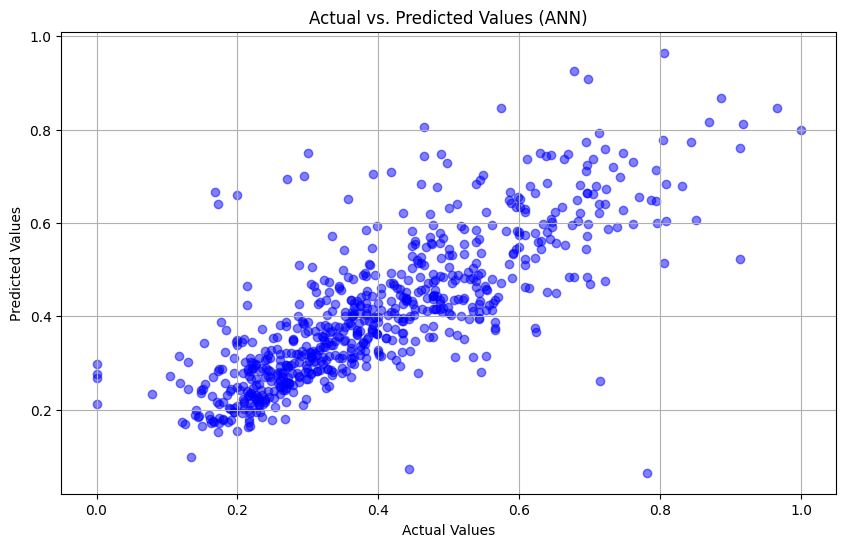

In [132]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ann, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Values (ANN)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
import pickle


Reg.fit(X_train, y_train)  # Train the model

# Save the model to a file
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(Reg, file)

In [ ]:
best_model_rf.fit(X_train, y_train)  # Train the model

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_model_rf, file)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)  # Train the model

# Save the model to a file
with open('ann_model.pkl', 'wb') as file:
    pickle.dump(model, file)